## SIR Model of an epidemic outbreak
#### Cedric Chauve, March 27, 2020

In this notebook, I use the simplest SIR model to try to assess some modelling issues regarding the nature of social distancing and testing interventions.

In [1]:
from scipy.integrate import odeint
import numpy as np                 
import matplotlib.pyplot as plt    
import math

In [99]:
# Main code for the basic SIR model

# ODE for the SIR, with two parameters,
# beta for the rate of infection by contact between the S and I compartments
# gamma for the removal rate, N for the population size
def diffs(y, t, N, beta, gamma):
    #The vector y holds all the initial values, see y_0 below
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = (beta * S * I / N) - (gamma * I)
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt

# Plotting the course of an outbreak
# Inputs - result from our ODE above for S, I, R
# Epidemiological parameters
#       - population N
#       - maxt = time frame considered
# Plotting parameters
#       - ticlen is the length between the tick marks on the x-axis
#       - title will be the title of your plot
def plot_ODE(S, I, R, N, t, maxt, fs, ticlen, title):
    fig = plt.figure(facecolor='w',figsize=fs)
    ax  = fig.add_subplot(111, facecolor='#dddddd')
    # Plots s(t) = S(t)/N over the domain of t and labels it 'Susceptible'
    ax.plot(t, S/N, 'b',label='Susceptible')
    # Plots i(t) = I(t)/N and labels it 'Infected'
    ax.plot(t, I/N, 'r', label='Infected')
    # Plots r(t) = R(t)/N and labels is 'Recovered'
    ax.plot(t, R/N, 'g', label='Recovered')
    
    ax.set_xlabel('Time (days)')
    plt.xticks(np.arange(0,maxt+1,ticlen),rotation=45)
    ax.set_ylabel('Total/N')
    ax.set_ylim(-0.1,1.1)
    ax.grid(color = 'w', linestyle = '-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    ax.set_title(title)    
    plt.show()

In [102]:
# We apply an SIR model to a succession of time intervals where for each interval we 
# apply a correcting factor to beta modelling social distancing and gamma modelling
# imporved testing followed by isolation of detected infected individuals
#
# N   = population size
# I_0 = number of infected individuals at time t=0
# R_0 = number of recovered individuals at time t=0
# interventions is a list of pairs (t,rb,rg) where t is an intervention duration 
# rb the correcting factor for beta during the time of the intervention
# rg the correcting factor for gamma during the time of the intervention
#
# ticlen and title are plotting parameters
def run_SIR_model_with_intervention(N,I_0,R_0,beta,gamma,interventions,ticlen,title):
    S_0       = N - I_0 - R_0 
    y         = [S_0, I_0, R_0]
    YS,YI,YR  = [],[],[]
    t_current = 0
    maxt      = 0
    for (t_int,rb,rg) in interventions:
        maxt += t_int-1
        t     = np.linspace(0, t_int, t_int)
        beta_current  = beta*rb
        gamma_current = gamma*rg
        ret = odeint(diffs, y, t, args=(N, beta_current, gamma_current))
        S_current, I_current, R_current = ret.T
        YS.append(S_current[:-1])
        YI.append(I_current[:-1])
        YR.append(R_current[:-1])
        y = [S_current[t_int-1],I_current[t_int-1],R_current[t_int-1]]
    S, I, R = np.concatenate(YS), np.concatenate(YI), np.concatenate(YR)
    t = np.linspace(0, maxt, maxt)
    return(plot_ODE(S,I,R,N,t,maxt,(10,5),ticlen,title))
    # print('Maximum number of infected people at some time point '+str(math.floor(max((I)))))

## Basic SIR model with no social distancing nor testing

We assume a population size of 100,000 individuals, $\beta=0.25$, $\gamma=0.1$ giving $R_0 = 2.5$, and we start with a single infected individual and no removed individual. We will keep these parameters through all the simulations.

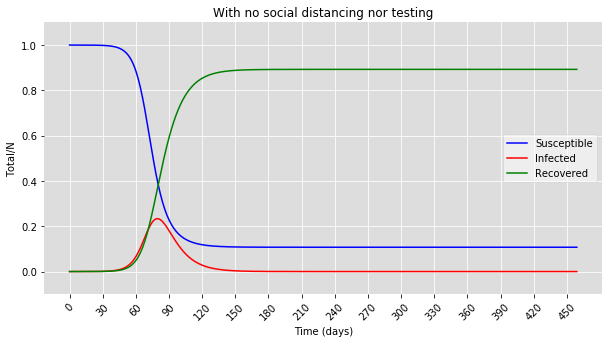

In [105]:
intervention0 = [(460,1,1)]
A = run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention0,30,'With no social distancing nor testing')

We can see the expected high peak of cases above 20% of the population at some time point, leading to an overwhelmed health system.

## Basic SIR model with a single sustained social distancing intervention and no testing

We assume social distancing implemented after 14 days and a correcting factor for $\beta$ of $0.6,\ 0.8$.

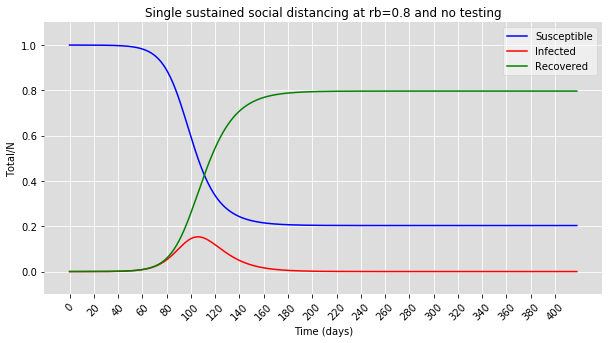

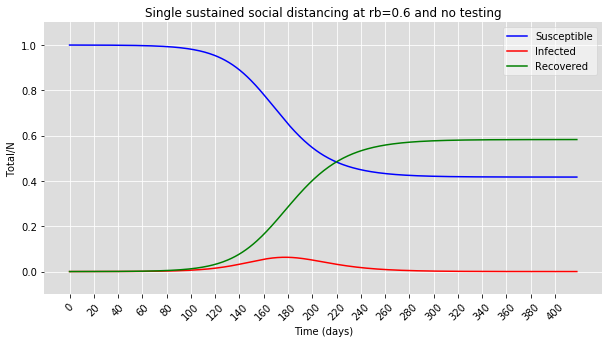

In [111]:
intervention1a = [(14,1,1),(406,0.8,1)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention1a,20,'Single sustained social distancing at rb=0.8 and no testing')

intervention1b = [(14,1,1),(406,0.6,1)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention1b,20,'Single sustained social distancing at rb=0.6 and no testing')

A quite strong and sustained social distancing intervention still leads to a significant peak although the curve is quite flattened. But this requires an almost year long intervention with social interactions reduced by half. This is likely not sustainable especially if schools are not closed.

## Basic SIR model with no social distancing and mild to strong testing

We assume testing leading to a mildly higher removal rate multiplied by $1.1$ and $1.5$.

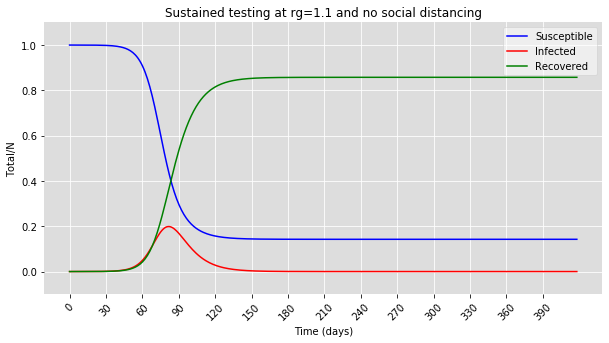

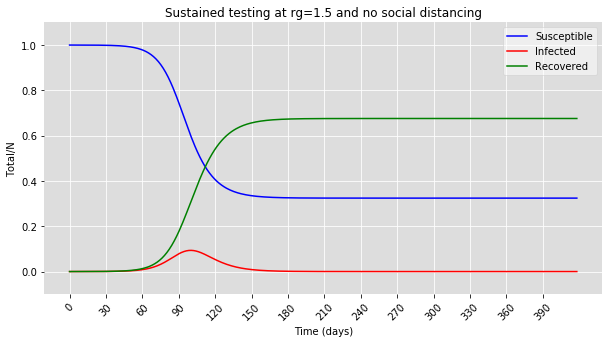

In [116]:
intervention2a = [(14,1,1),(406,1,1.1)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention2a,30,'Sustained testing at rg=1.1 and no social distancing')

intervention2b = [(14,1,1),(406,1,1.5)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention2b,30,'Sustained testing at rg=1.5 and no social distancing')

Testing alone, even at a quite strong level that increases the removel rate by half, does not lead to a curve flattened enough.

## Basic SIR model with a single sustained social distancing intervention and constant testing

We assume social distancing implemented after 14 days and a correcting factor for $\beta$ of $0.8, 0.6$.

We assume testing implemented after 14 days and resulting in a correcting factor for $\gamma$ of $1.1, 1.5$ thus accelerating mildly the removal rate.

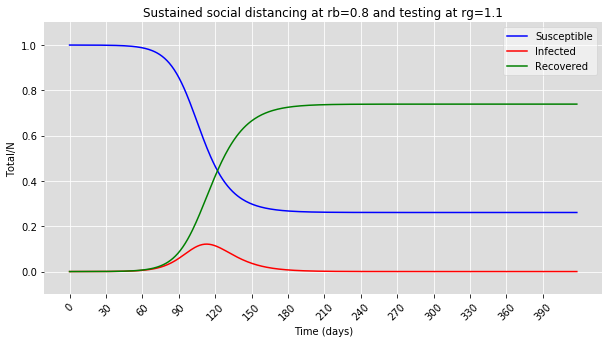

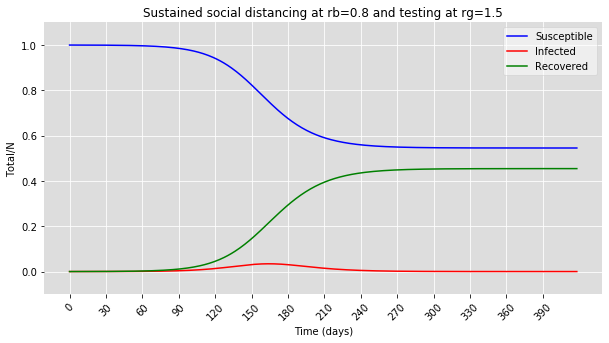

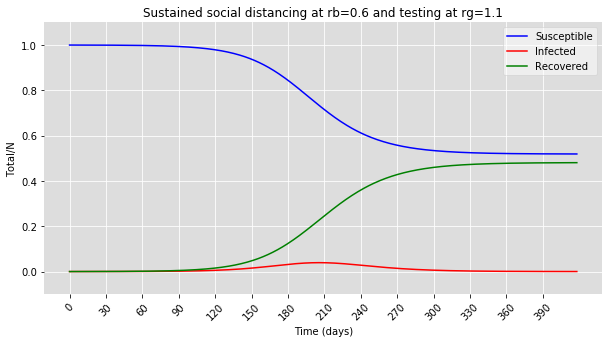

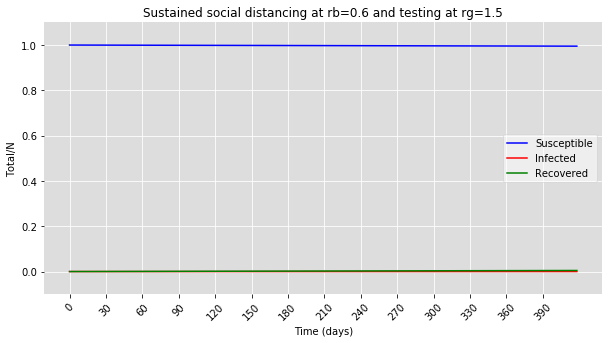

In [128]:
intervention3a = [(14,1,1),(406,0.8,1.1)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention3a,30,'Sustained social distancing at rb=0.8 and testing at rg=1.1')

intervention3b = [(14,1,1),(406,0.8,1.5)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention3b,30,'Sustained social distancing at rb=0.8 and testing at rg=1.5')

intervention3c = [(14,1,1),(406,0.6,1.1)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention3c,30,'Sustained social distancing at rb=0.6 and testing at rg=1.1')

intervention3d = [(14,1,1),(406,0.6,1.5)]
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,intervention3d,30,'Sustained social distancing at rb=0.6 and testing at rg=1.5')

Relatively mild, but sustained, social distancing ($0.8$) and strong testing (1.5) has a very significant effect. 

## Modelling alternating strict and relaxed social distancing with mild to strong testing

We assume an alternance of period of 5 weeks where $\beta$ is mildly reduced (e.g. schools are open, large set of open businesses) followed by periods of two weeks where it is strongly reduced, together with constant sustained testing.

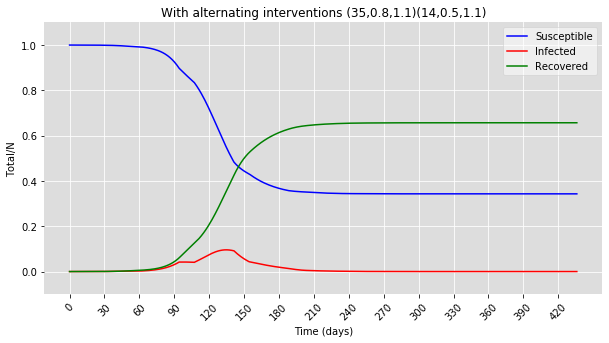

In [133]:
interventions4a = [(14,1,1)]
for i in range(9):
    interventions4a.append((35,0.8,1.1))
    interventions4a.append((14,0.5,1.1))
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,interventions4a,30,'With alternating interventions (35,0.8,1.1)(14,0.5,1.1)')

With mild testing, the peak is still too high.

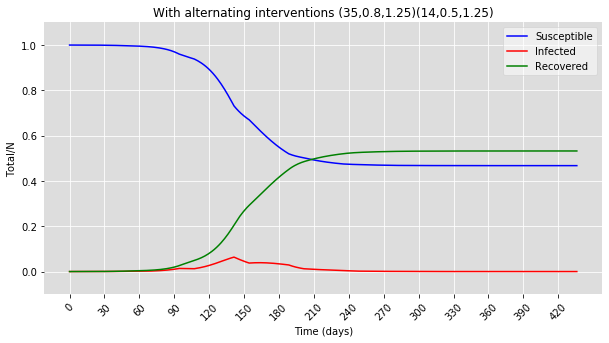

In [134]:
interventions4b = [(14,1,1)]
for i in range(9):
    interventions4b.append((35,0.8,1.25))
    interventions4b.append((14,0.5,1.25))
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,interventions4b,30,'With alternating interventions (35,0.8,1.25)(14,0.5,1.25)')

Increasing the testing has a significant effect, althouygh we still observe a very visible peak.

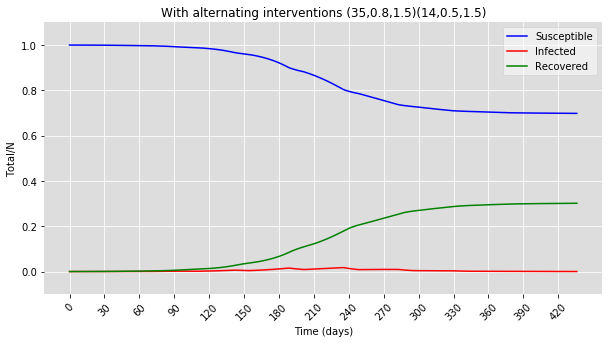

In [135]:
interventions4c = [(14,1,1)]
for i in range(9):
    interventions4c.append((35,0.8,1.5))
    interventions4c.append((14,0.5,1.5))
run_SIR_model_with_intervention(100000,1,0,0.25,0.1,interventions4c,30,'With alternating interventions (35,0.8,1.5)(14,0.5,1.5)')

Strong testing has a very significant effect.